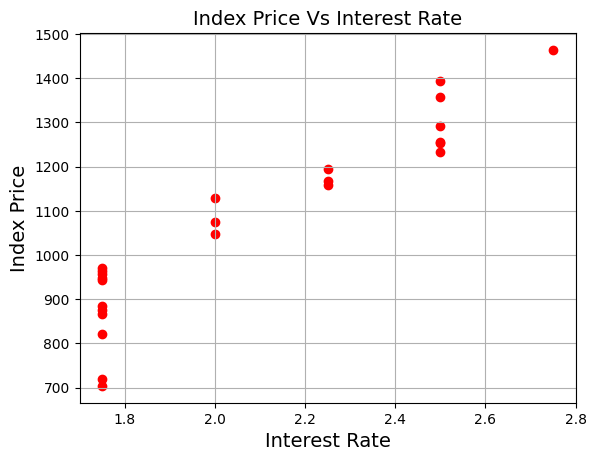

Intercept: 1798.4039776258544
Coefficients: [ 345.54008701 -250.14657137]
                            OLS Regression Results                            
Dep. Variable:            index_price   R-squared:                       0.898
Model:                            OLS   Adj. R-squared:                  0.888
Method:                 Least Squares   F-statistic:                     92.07
Date:                Mon, 21 Apr 2025   Prob (F-statistic):           4.04e-11
Time:                        20:34:42   Log-Likelihood:                -134.61
No. Observations:                  24   AIC:                             275.2
Df Residuals:                      21   BIC:                             278.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm

data = {
    'year': [2017]*12 + [2016]*12,
    'month': list(range(12, 0, -1)) * 2,
    'interest_rate': [
        2.75, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.25, 2.25, 2.25, 2, 2,
        2, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75, 1.75
    ],
    'unemployment_rate': [
        5.3, 5.3, 5.3, 5.3, 5.4, 5.6, 5.5, 5.5, 5.5, 5.6, 5.7, 5.9,
        6, 5.9, 5.8, 6.1, 6.2, 6.1, 6.1, 6.1, 5.9, 6.2, 6.2, 6.1
    ],
    'index_price': [
        1464, 1394, 1357, 1293, 1256, 1254, 1234, 1195, 1159, 1167, 1130, 1075,
        1047, 965, 943, 958, 971, 949, 884, 866, 876, 822, 704, 719
    ]
}

df = pd.DataFrame(data)

plt.scatter(df['interest_rate'], df['index_price'], color='red')
plt.title('Index Price Vs Interest Rate', fontsize=14)
plt.xlabel('Interest Rate', fontsize=14)
plt.ylabel('Index Price', fontsize=14)
plt.grid(True)
plt.show()

x = df[['interest_rate', 'unemployment_rate']]
y = df['index_price']

regr = linear_model.LinearRegression()
regr.fit(x, y)

print('Intercept:', regr.intercept_)
print('Coefficients:', regr.coef_)

x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
print(model.summary())
